<a href="https://colab.research.google.com/github/GGPwis/Aprendizaje-Automatico/blob/main/PORTAL_GUSTAVO_TP2_AA1_aprendizaje_no_supervisado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1 Aprendizaje no supervisado

**PORTAL, GUSTAVO GABRIEL**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

- Importamos librerias y herramientas necesarias para manipular, visualizar y procesar datos.


In [1]:
# Librerías principales de manipulación y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# Librerías de preprocesamiento
from sklearn.preprocessing import StandardScaler

# Librerías para clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Métricas de evaluación
from sklearn.metrics import silhouette_score

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Visualización 3D
from mpl_toolkits.mplot3d import Axes3D

**Dataset: Auto MPG**
 - El dataset con el que decidí trabajar contiene información sobre el consumo de combustible medido en millas por galón de automóviles fabricados entre 1970 y 1982, en ciclo urbano.

In [2]:
# URL del archivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Definir nombres en español
columnas = ["consumo_mpg", "cilindros", "cilindrada", "caballos_fuerza", "peso",
            "aceleracion", "año_modelo", "origen", "nombre_auto"]

# Leer el archivo usando separación por espacios
df = pd.read_csv(url, delim_whitespace=True, names=columnas)
df.head()

<ipython-input-2-7153df9435a4>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columnas)


,consumo_mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,año_modelo,origen,nombre_auto
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


El dataset contiene distintas variables numéricas, tanto continuas como discretas, y una variable categórica que corresponde al nombre del modelo de auto. Por lo tanto, cumple con la condición de tener al menos cuatro variables continuas, requeridas para la aplicación de técnicas de clustering.

**Variables**
- consumo_mpg: variable continua que representa el consumo de combustible en millas por galón (mpg).

- cilindros: variable discreta multivalor que indica la cantidad de cilindros del motor.

- cilindrada: variable continua que indica el desplazamiento del motor en pulgadas cúbicas.

- caballos_fuerza: variable continua que representa la potencia del motor.

- peso: variable continua que indica el peso del vehículo.

- aceleracion: variable continua que representa el tiempo en segundos que tarda el auto en pasar de 0 a 60 mph.

- año_modelo: variable discreta que indica el año del modelo del auto.

- origen: variable discreta que identifica la región de fabricación del vehículo (1: EE.UU., 2: Europa, 3: Japón).

- nombre_auto: variable de tipo cadena, contiene el nombre del vehículo


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

**Informacion general**

Al inspeccionar la información general del dataset con `df.info()`, se observa que la variable caballos_fuerza aparece con tipo de dato object, lo que indica que contiene valores no numéricos. Esto sugiere que requiere una transformación para poder utilizarla en análisis numéricos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   consumo_mpg      398 non-null    float64
 1   cilindros        398 non-null    int64  
 2   cilindrada       398 non-null    float64
 3   caballos_fuerza  398 non-null    object 
 4   peso             398 non-null    float64
 5   aceleracion      398 non-null    float64
 6   año_modelo       398 non-null    int64  
 7   origen           398 non-null    int64  
 8   nombre_auto      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Antes de proceder a realizar los gráficos de histogramas o boxplots, decidí inspeccionar la variable `caballos_fuerza`, ya que en la descripción del dataset figura como numérica, pero al imprimir las primeras filas se observa que no fue interpretada como tal.

El primer paso fue utilizar `df["caballos_fuerza"].unique()` para observar los valores únicos de la columna. Allí noté la presencia del símbolo `'?'`, lo que impide que Python la reconozca como una variable numérica y la clasifica como tipo object.

Luego, con la instrucción `(df["caballos_fuerza"] == '?').sum()`, contabilicé un total de 6 filas sobre un total de 398, es decir, aproximadamente el 1.5% del dataset.

Para poder continuar con los graficos, reemplacé los `'?'` por `np.nan` y  convertí la columna a tipo float para poder trabajarla correctamente como variable numérica pa que pueda ser visualizada correctamente como variable numerica.

In [4]:
# Valores unicos de caballos_fuerza
df["caballos_fuerza"].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [5]:
# Reemplazar el símbolo '?' por np.nan en la columna 'caballos_fuerza'
df["caballos_fuerza"] = df["caballos_fuerza"].replace('?', np.nan)

# Convertir la columna a tipo float
df["caballos_fuerza"] = df["caballos_fuerza"].astype(float)

In [6]:
# Valores nulos
print(df.isnull().sum())

consumo_mpg        0
cilindros          0
cilindrada         0
caballos_fuerza    6
peso               0
aceleracion        0
año_modelo         0
origen             0
nombre_auto        0
dtype: int64


Con `df.describe()` obseramos algunas características del conjunto de datos.

Por ejemplo, la variable consumo_mpg no presenta una gran variabilidad: la desviación estándar es moderada y la media y la mediana son similares.

La variable cilindrada muestra una alta dispersión, con una desviación estándar elevada y una diferencia grande entre media y mediana.

Observando los cuartiles podemos inferir en que mas del 50% de los autos son estadounidenses

In [7]:
df.describe()

,consumo_mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,año_modelo,origen
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**Graficos:**
Histogramas

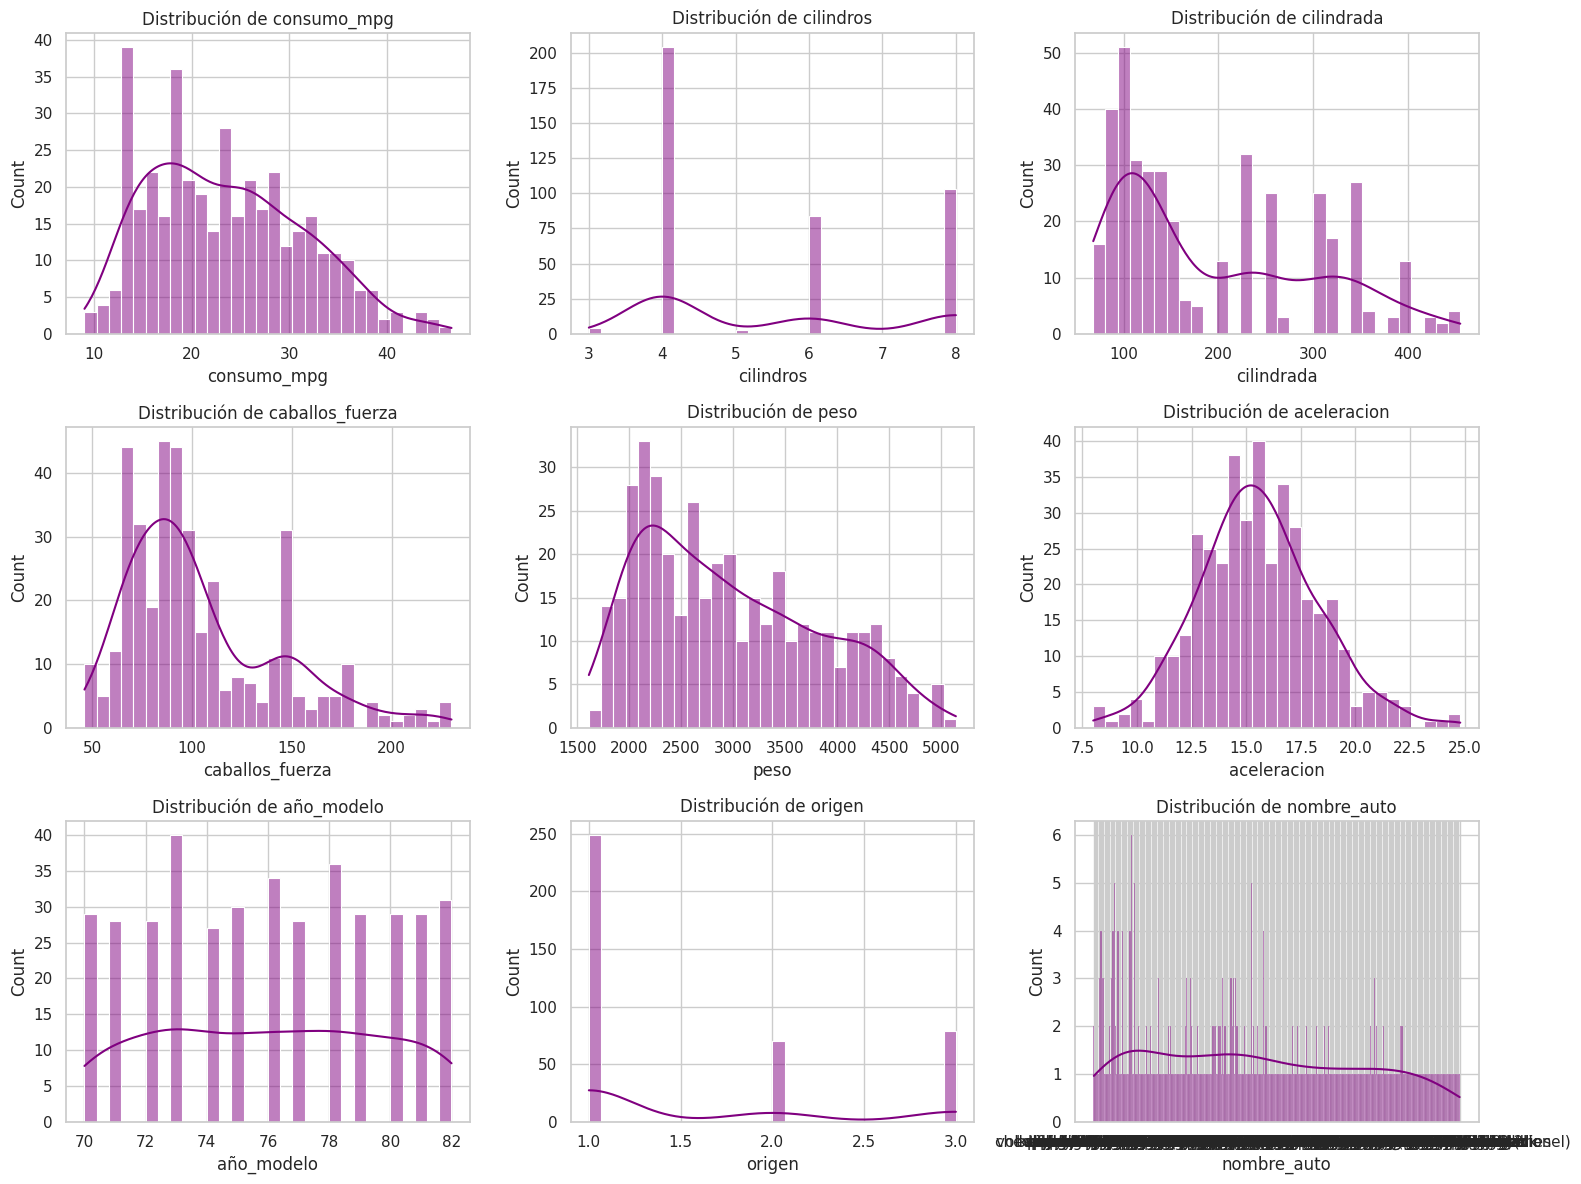

In [8]:
plt.figure(figsize=(16, 12))
for x, col in enumerate(columnas):
    plt.subplot(3, 3, x + 1)
    sns.histplot(df[col], kde=True, color='purple', bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

**Observaciones de los Histogramas**

- `año_modelo` presenta una distribución simétrica, con una cantidad relativamente uniforme de autos por año entre 1970 y 1982.

- `aceleracion` muestra una distribución cercana a una normal, centrada en torno a los 15–16 segundos.

- `peso`, `cilindrada` y `caballos_fuerza` presentan distribuciones sesgadas hacia la derecha , lo que indica la presencia de autos más pesados y potentes que la mayoría, posiblemente considerados outliers. tambien puedo decir que esta relacion podria generar clusters bien diferenciados.

- `cilindros` posee muy pocos valores, se pueden distingir tres grandes grupos: motores de 4 cilindros, 8 cilindros y 6 cilindros.

- `consumo_mpg` se concentra principalmente entre 14 y 25 mpg, también con una asimetría hacia la derecha.

**Graficos:**
Box-plots

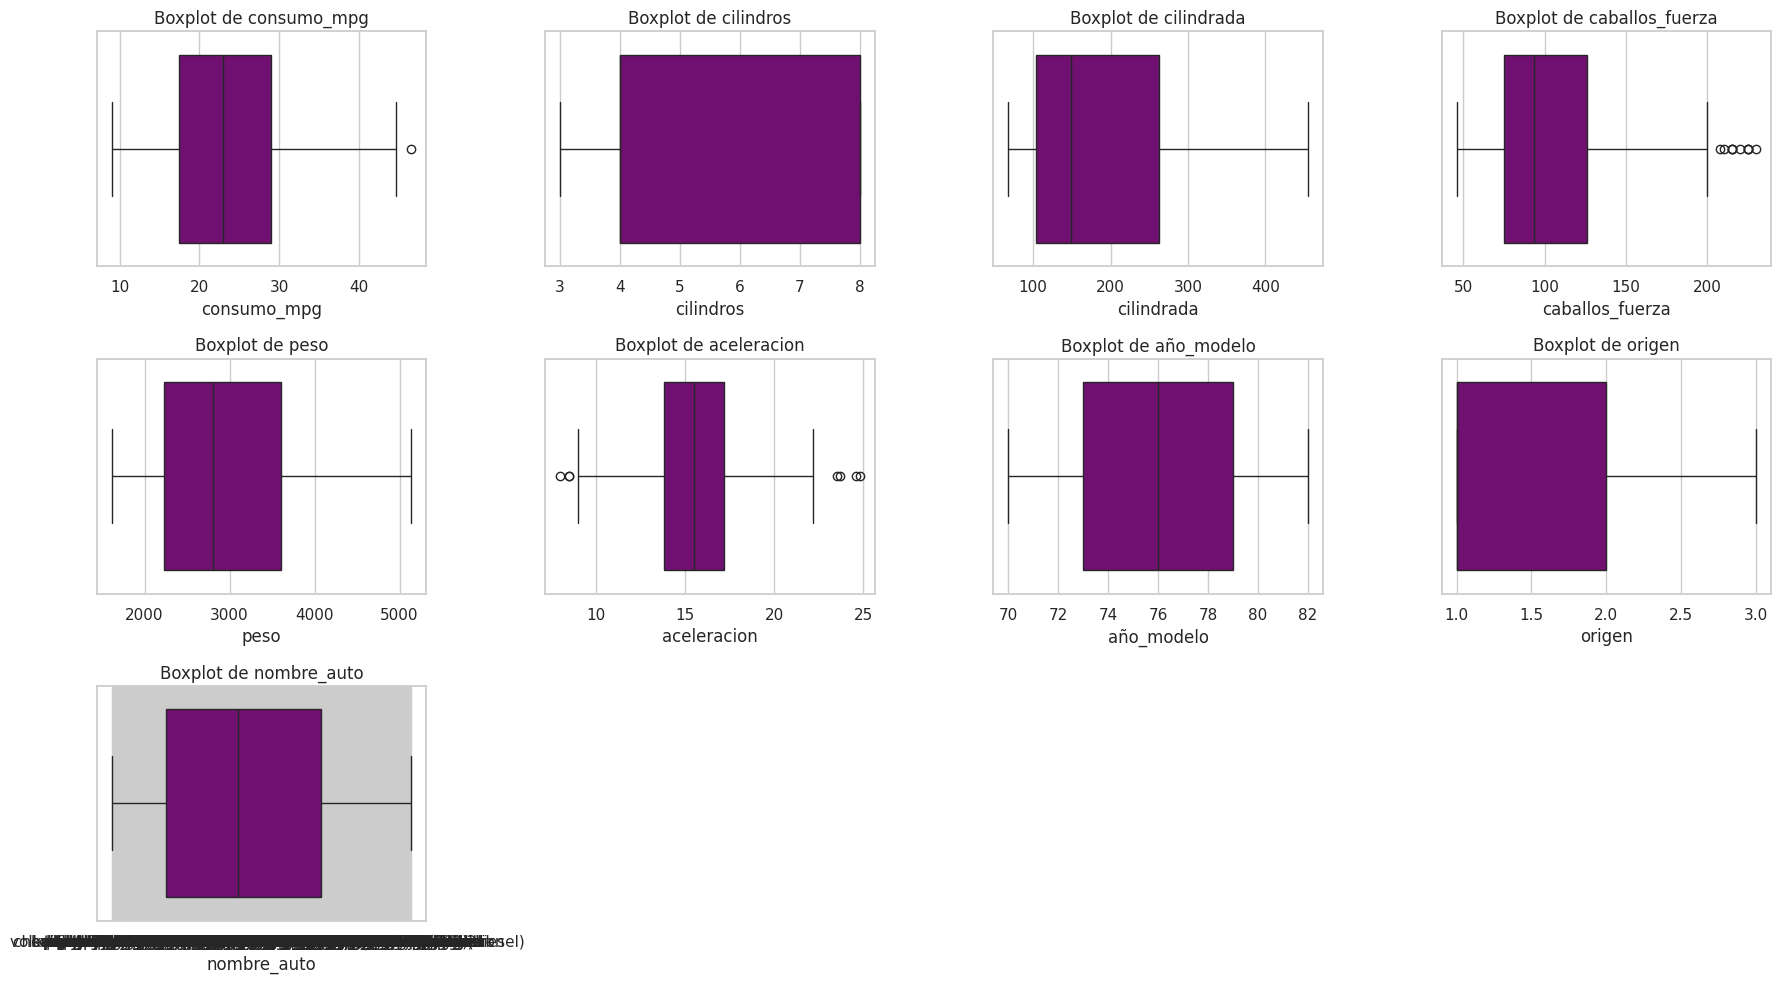

In [9]:
plt.figure(figsize=(18, 10))
for x, col in enumerate(columnas):
    plt.subplot(3, 4, x + 1)
    sns.boxplot(x=df[col], color='purple')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

**Observaciones de los Box-plots**
- `aceleracion` presenta outliers en ambos extremos hay vehículos que aceleran muy rápido menos de 9 segundos, posiblemente deportivos o modernos y otros que superan los 22.5 segundos probablemente más antiguos o pesados. El 50% de los datos se concentra entre aproximadamente 14 y 16 segundos.

- `caballos_fuerza` precenta outliers hacia la derecha por encima de los 200 caballos de fuerza esto indica que hay autos muy potentes poco comunes asi tambien la distribucion se encuentra sesgada hacia la derecha

- `cilindrada` tambien se observa la distribucion sesgada hacia la derecha pero no precenta outliers, estas ultimas variables `caballos_fuerza` y `cilindrada` podrian estar fuertemente relacionadas ya que a mayor cilindrada, mas caballos de fuerza.

**Graficos:** Scatterplots

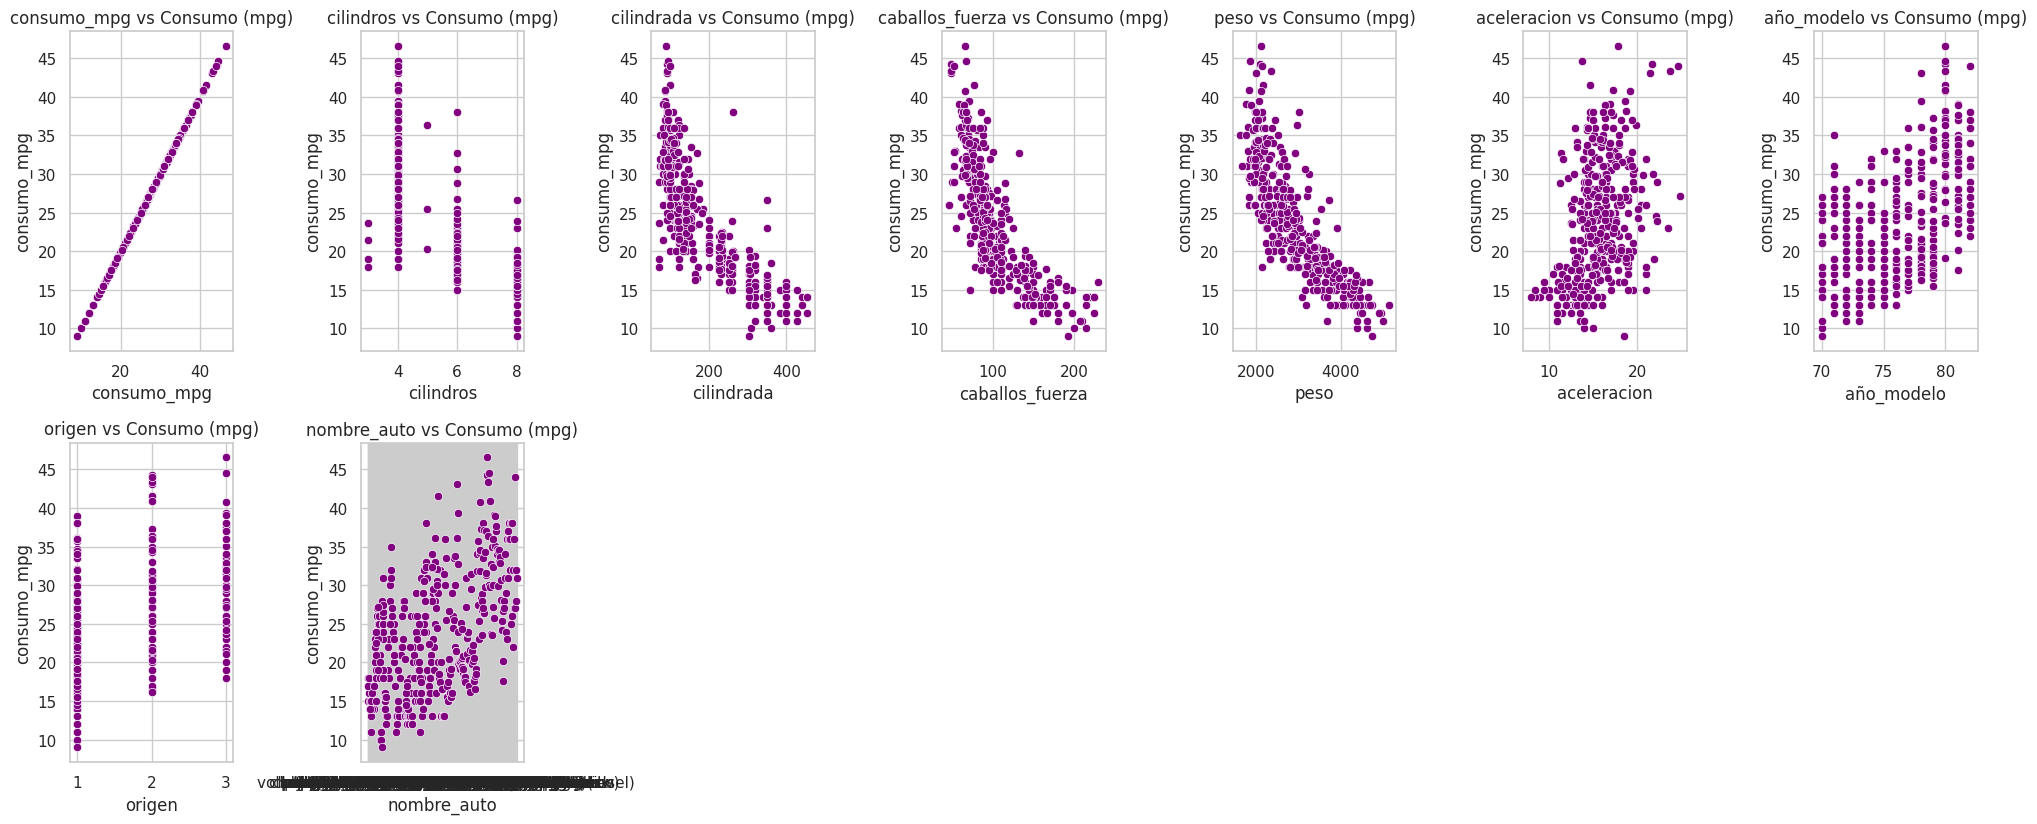

In [10]:
# Scatterplots entre variables y la variable 'consumo_mpg'
plt.figure(figsize=(20, 12))
for x, col in enumerate(columnas):
    plt.subplot(3, 7, x + 1)
    sns.scatterplot(x=df[col], y=df['consumo_mpg'], color ='purple')
    plt.title(f'{col} vs Consumo (mpg)')
plt.tight_layout()
plt.show()

**Observaciones del Scatterplots**

- `cilindros` vs `consumo(mpg)`: se observa que los autos mas eficientes en cuanto a consumo son los de cuatro cilindros ya que reccoren mas millas por galon. Los menos eficinetes son los de 8 cilindros ya que recorren menos millas por galon.
- `cilindrada` vs `consumo(mpg)`: se observa una relacion negatica, a menor cilindradas mas millas por galon y a mas cilindradas menos millas por galon (motores mas grandes consumen mas)
- `caballos_fuerza` vs `consumo(mpg)`: muy similar a la anterior distribucion mas caballos de fuerza mas consumo o para decirlo de otra forma menos millas recorridas por galon.
- `peso` vs `consumo`: autos mas liviamos hacen mas millas por galon es una realacion similar a las ultimas dos una relacion negativa.
- `aceleracion` vs `consumo(mpg)`: se ve una distribucion mas dispersasin una tendencia clara.
- `año_modelo` vs `consumo(mpg)`: se puede observaar los modelos nuevos de autos tienden a gastar menos conbustible, osea hacen mas millas por galon.

**Gafricos:** Matriz de Correlacion

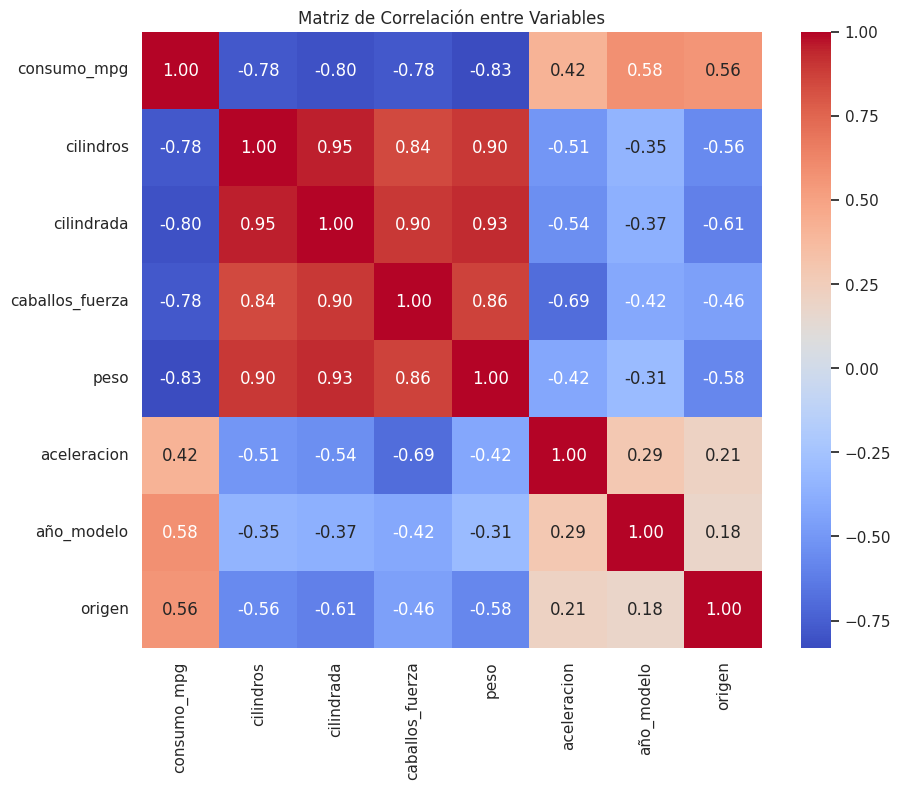

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

**Observaciones de la Matriz de Correlacion:**
- A partir de la matriz de correlación se observa que la variable `consumo_mpg` presenta correlaciones negativas muy fuertes con `peso` (−0.83), `cilindrada` (−0.81), `cilindros` (−0.78) y `caballos_fuerza` (−0.78). Esto indica que los autos más grandes, pesados y potentes tienden a consumir más combustible, lo cual es coherente con lo observado en los gráficos de dispersión.
- También se destaca una correlación positiva moderada entre `consumo_mpg` y `año_modelo` (0.58), lo que sugiere que los autos más nuevos tienden a ser más eficientes. De forma similar, la correlación positiva con `origen` (0.57) sugiere que los vehículos provenientes de ciertos mercados consumen menos.
- correlaciones muy altas entre `cilindrada` y `cilindros` (0.95), o `peso` y `caballos_fuerza` (0.86), lo que indica redundancia en la información.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

**Limpieza:**

- No se considera la variable `consumo_mp` para ser parte del clustering, ya que la considero como un target osea una variable resultado y la idea es conseguir agrupaciones naturales basadas exclusivamente en características técnicas de los veiculos.

- Se eliminó la columna `cilindros` debido a su alta correlación con otras variables como `cilindrada`, `caballos_fuerza` y `peso`. Mantener esta variable podría generar redundancia de información y otorgarle peso al momento de formar los clusters.

- Se eliminaron los registros con valores faltantes `(NaN)`, ya que representaban aproximadamente el 1.5% del total. Dado que esta proporción es muy baja, se consideró que su eliminación no afectaría el análisis.

- No se utilizaron variables categóricas, ya que la única presente es `nombre_auto`, y no aporta información relevante. En cambio, se decidió conservar la variable `origen`, ya que puede influir en el comportamiento del consumo. Tal como se observó, existe una relación negativa entre `origen` y `consumo_mpg`

- Se estandarizaron todas las variables numéricas, debido a que se expresan en distintas unidades de medida. Esta transformación es fundamental para aplicar correctamente el algoritmo `K-means`, ya que este es sensible a las escalas de las variables.


## Resolución:

In [12]:
# Eliminar Valores nulos.
df = df.dropna()

In [13]:
# Eliminar la columna cilindros por correlacion alta.
df = df.drop(['cilindros'], axis=1)
df.head()

,consumo_mpg,cilindrada,caballos_fuerza,peso,aceleracion,año_modelo,origen,nombre_auto
0,18.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,302.0,140.0,3449.0,10.5,70,1,ford torino


In [14]:
# Estandarizacion
X = df[['cilindrada', 'caballos_fuerza', 'peso', 'aceleracion', 'año_modelo', 'origen']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe()

,cilindrada,caballos_fuerza,peso,aceleracion,año_modelo,origen
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16,-1.160070e-15,1.359457e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00,-1.625315e+00,-7.166410e-01
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01,-8.098841e-01,-7.166410e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02,5.547151e-03,-7.166410e-01
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01,8.209784e-01,5.263824e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00,1.636410e+00,1.769406e+00





## 4. **Clustering**  
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

**Eleccion de la cantidad de Clusters para K-means:**

- Suma de las Distancias Cuadraticas vs N Clusters

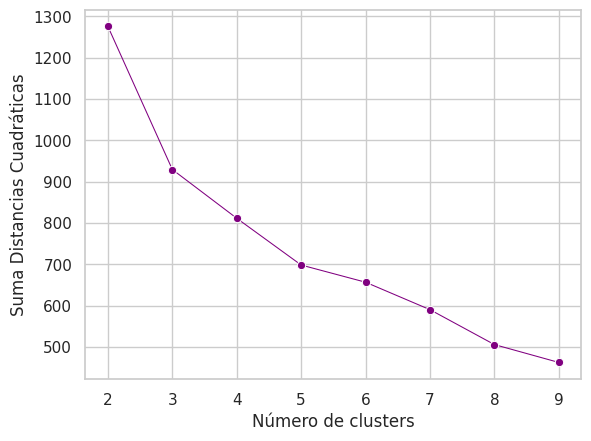

In [16]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False, color='purple');
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Observando el grafico considero que 5 es el numero ideal de clusters.

- Silhoutte Score vs N Clusters

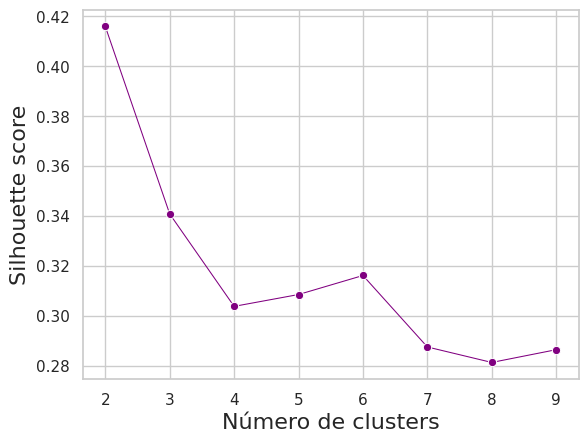

In [17]:
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    score=silhouette_score(X_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False, color='purple');
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16);

In [54]:
# Aplicamos K-means definitivo con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_scaled)

# Etiquetas y centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Guardamos las etiquetas en el DataFrame original
df['cluster'] = labels

In [55]:
# Etiquetas de cada dato
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 5, 5, 2, 4, 4, 5,
       4, 5, 5, 1, 1, 1, 1, 2, 5, 2, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1,
       5, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 5, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 4, 4, 4, 5, 2, 2, 5, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 4, 1, 1, 1, 1, 5, 4, 4, 2,
       2, 4, 5, 4, 1, 1, 4, 4, 5, 5, 1, 5, 2, 1, 5, 5, 5, 4, 5, 4, 5, 5,
       3, 5, 1, 1, 1, 1, 1, 4, 4, 0, 2, 4, 0, 4, 0, 2, 2, 4, 5, 5, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 5, 5, 1, 2, 5, 5, 4, 2, 4, 2, 5, 0, 5, 5,
       4, 5, 5, 2, 0, 4, 0, 4, 0, 1, 1, 1, 1, 5, 5, 3, 3, 4, 4, 0, 2, 3,
       3, 3, 3, 0, 2, 2, 0, 5, 1, 4, 2, 3, 1, 1, 1, 1, 2, 0, 4, 0, 2, 1,
       3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       4, 0, 2, 2, 2, 3, 1, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       0, 2, 2, 0, 2, 3, 3, 2, 0, 0, 0, 3, 0, 2, 3, 3, 3, 3, 3, 3, 1, 1,
       3, 1, 1, 3, 1, 0, 2, 0, 0, 3, 3, 4, 3, 0, 0,

In [56]:
# Coordenadas de los centroides.
kmeans.cluster_centers_

array([[-0.71903211, -0.56783581, -0.74283697, -0.25770895,  0.79974321,
        -0.28935175],
       [ 1.47714886,  1.50750782,  1.38260521, -1.07284772, -0.66968714,
        -0.71664105],
       [-0.8586774 , -0.61799695, -0.86134373,  0.13961996,  0.50076339,
         1.76940577],
       [ 0.16963506, -0.19592845,  0.37021055,  0.86681079,  0.70630838,
        -0.58068536],
       [-0.90522218, -0.89784124, -0.89395311,  1.28165562, -0.58131624,
         0.41338023],
       [-0.05104817, -0.18679882, -0.10168028, -0.07013632, -0.84124683,
        -0.45369379]])

In [57]:
# Suma total de las distancias cuadraticas
kmeans.inertia_

656.4880772669783

### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

- Agregamos una nueva columna `clusters` al dataframe original con los valores del cluster al que pertenece cada dato.

In [58]:
df['cluster'] = kmeans.labels_

In [59]:
df.head()

,consumo_mpg,cilindrada,caballos_fuerza,peso,aceleracion,año_modelo,origen,nombre_auto,cluster
0,18.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,302.0,140.0,3449.0,10.5,70,1,ford torino,1


- Calculamos las medias de cada clusters para poder hacer el analisis intra-clusters

In [60]:
df.groupby('cluster').mean(numeric_only=True)

,consumo_mpg,cilindrada,caballos_fuerza,peso,aceleracion,año_modelo,origen
cluster,,,,,,,
0,29.801562,119.265625,82.640625,2347.421875,14.831250,78.921875,1.343750
1,14.464211,348.789474,162.421053,4150.473684,12.585263,73.515789,1.000000
2,30.473973,104.671233,80.712329,2246.890411,15.926027,77.821918,3.000000
3,21.848437,212.140625,96.937500,3291.640625,17.929688,78.578125,1.109375
4,27.647727,99.806818,69.954545,2219.227273,19.072727,73.840909,1.909091
5,20.576923,189.076923,97.288462,2891.326923,15.348077,72.884615,1.211538


**Analisis Intra-Clusters:**

- Cluster 0: vehículos recientes, con baja potencia pero una aceleración eficiente y un consumo de combustible reducido. Este comportamiento podría estar asociado a mejoras tecnológicas en eficiencia energética.

- Cluster 1: autos antiguos, de gran peso, alta cilindrada y potencia elevada, presentan el consumo más alto del conjunto. Todos los vehículos de este grupo son de origen estadounidense.

- Cluster 2: vehículos más eficientes en términos de consumo. Son muy livianos, con baja potencia y modelos recientes. Todos los autos de este cluster pertenecen a Japón.

- Cluster 3: autos modernos y potentes, con peso intermedio y un consumo moderado. Pueden interpretarse como vehículos de gama media o deportiva, con buen rendimiento pero sin llegar al consumo elevado del cluster 1.

- Cluster 4: vehículos livianos, de baja cilindrada y potencia, y con un consumo eficiente, los modelos son algo más antiguos.

- Cluster 5: vehículos de mediana potencia y alto consumo, son modelos más antiguos. Son autos intermedios en tamaño y prestaciones.

**Graficos de Box-Plots**

<ipython-input-61-8e7210fdaffc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=var, data=df, ax=axes[i], palette='Set2')
<ipython-input-61-8e7210fdaffc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=var, data=df, ax=axes[i], palette='Set2')
<ipython-input-61-8e7210fdaffc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=var, data=df, ax=axes[i], palette='Set2')
<ipython-input-61-8e7210fdaffc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

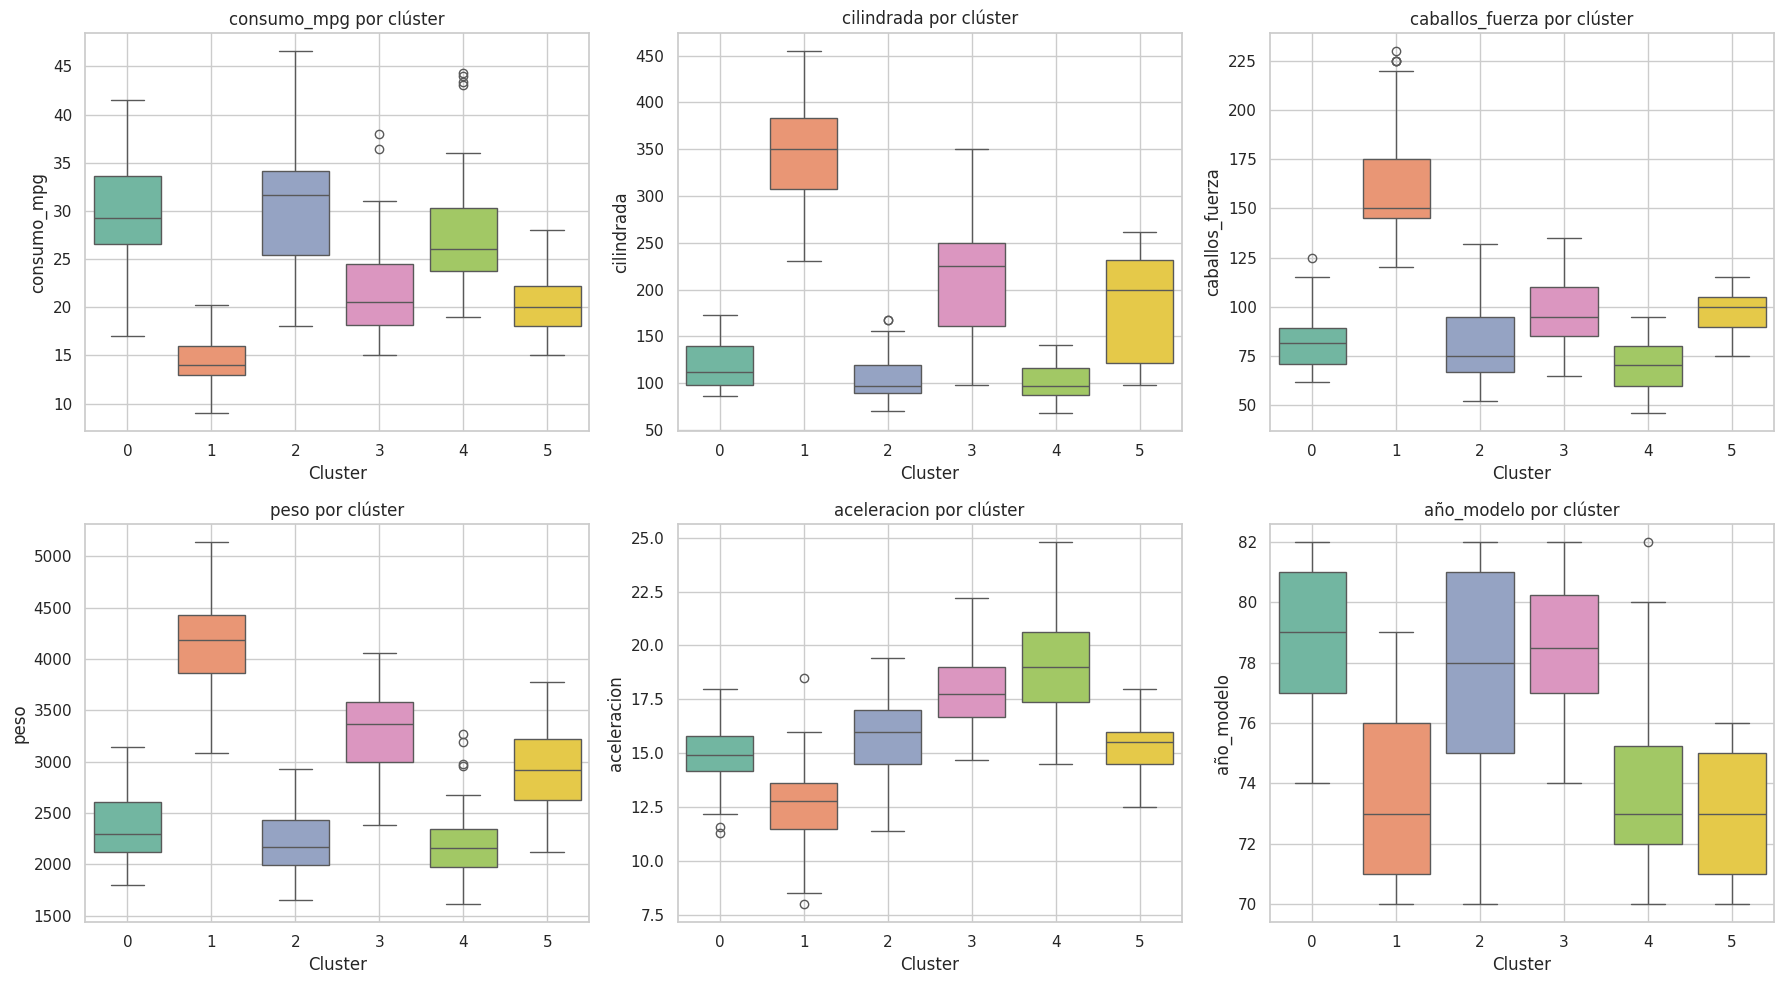

In [61]:
variables = ['consumo_mpg', 'cilindrada', 'caballos_fuerza', 'peso', 'aceleracion', 'año_modelo']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(x='cluster', y=var, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{var} por clúster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(var)
    axes[i].grid(True)

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()

**Analisis Box-plots**

Ciertamente muestan lo mismo que ya vinimos mencionando,

- Cluster 1 es el de autos grandes, potentes, antiguos y de alto consumo (claramente separado).

- Clusters 0 y 2 agrupan autos modernos, eficientes, livianos y de baja cilindrada.

- Cluster 4 parece contener autos livianos y lentos, pero con rendimiento aceptable, probablemente europeos.

- Cluster 5 y 3 representan autos más mixtos, con consumos y características intermedias.

## 5- Reducción de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

El análisis de componentes principales (PCA) se utilizó para reducir la dimensionalidad de los datos y facilitar la visualización de los clusters formados por K-means.

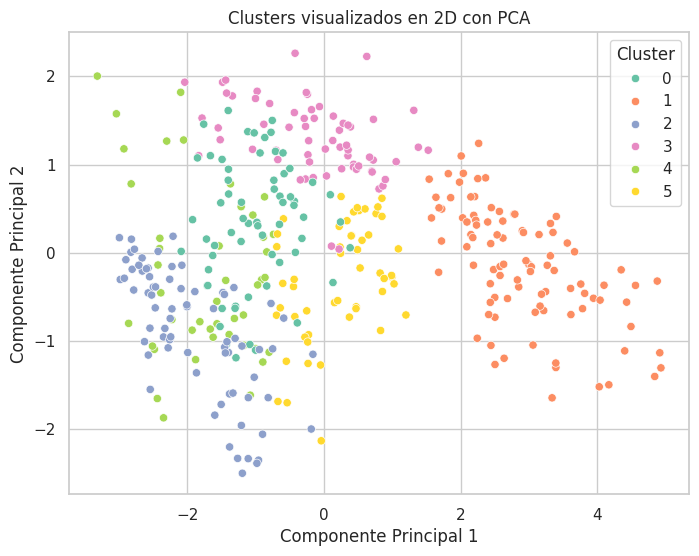

In [62]:
# Aplicamos PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creamos el gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2', legend='full')
plt.title("Clusters visualizados en 2D con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

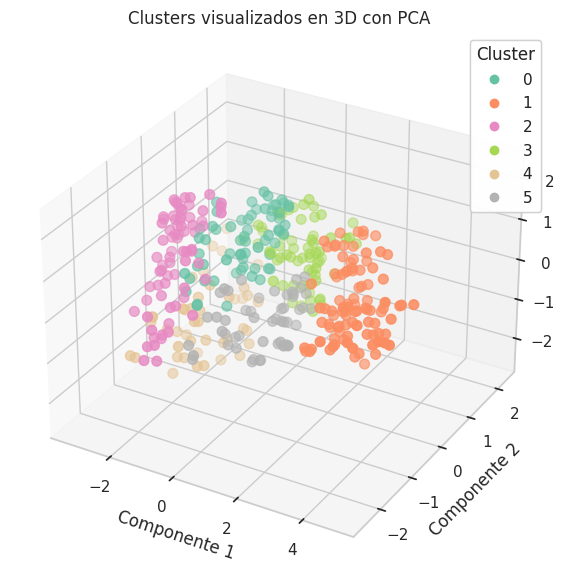

In [63]:
# Aplicamos PCA con 3 componentes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Creamos el gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los puntos en 3Des
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=df['cluster'], cmap='Set2', s=50
)

# Etiquetas de ejes
ax.set_title("Clusters visualizados en 3D con PCA")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")

# Agregar leyenda
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()

### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

- Metodo del codo para elegir la cantidad de clusters.

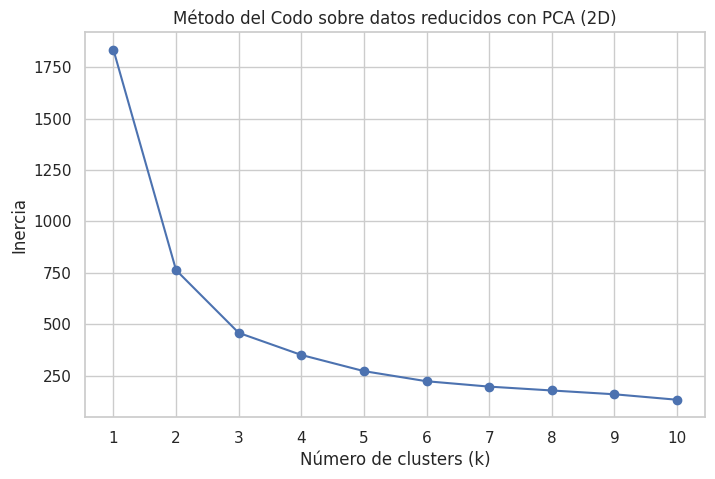

In [64]:
inertias_pca = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    inertias_pca.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertias_pca, marker='o')
plt.title("Método del Codo sobre datos reducidos con PCA (2D)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.xticks(K)
plt.show()

- Silhouette_Scores para reforzar nuestra eleccion de clusters

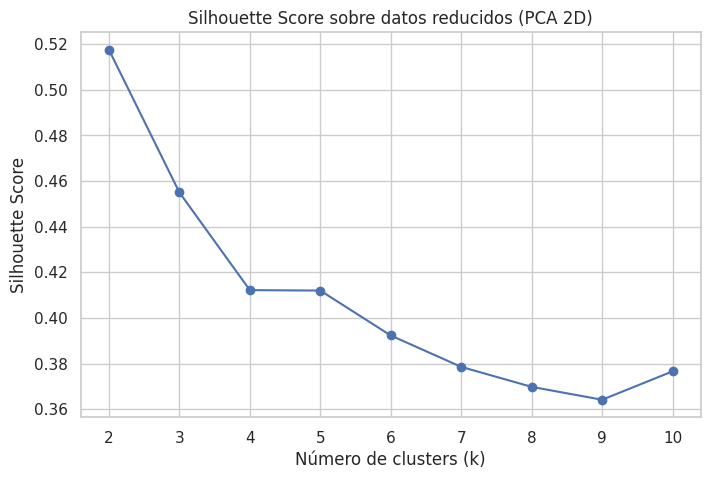

In [65]:
silhouette_scores_pca = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores_pca.append(score)

# Gráfico del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores_pca, marker='o')
plt.title("Silhouette Score sobre datos reducidos (PCA 2D)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(K)
plt.show()

Observando ambos graficos decido que la cantidad de clusters adecuada es 3.

In [68]:
# Aplicar K-means con k = 3 sobre datos reducidos
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(X_pca)

# Obtener etiquetas
labels_pca = kmeans_pca.labels_

# Guardamos las etiquetas en un nuevo DataFrame
df['cluster_pca'] = labels_pca

In [71]:
df['cluster_pca'].value_counts().sort_index()

,count
cluster_pca,
0,154
1,96
2,142


In [72]:
# Calculamos las medias de cada clusters para poder hacer el analisis intra-clusters
df.groupby('cluster_pca').mean(numeric_only=True)

,consumo_mpg,cilindrada,caballos_fuerza,peso,aceleracion,año_modelo,origen,cluster
cluster_pca,,,,,,,,
0,23.437662,183.519481,92.324675,2947.064935,16.740260,77.298701,1.084416,2.707792
1,14.501042,347.843750,161.875000,4138.093750,12.594792,73.489583,1.000000,1.041667
2,29.502113,102.496479,78.830986,2226.112676,16.233099,76.232394,2.500000,2.478873


- Cluster 0: Autos equilibrados, modernos, de tamaño y rendimiento intermedio. No extremos ni en potencia ni en consumo.
- Cluster 1: Vehículos grandes, potentes y viejos, todos de EEUU. Grupo muy claro.
- Cluster 2: Autos compactos, poco potentes y muy eficientes encuanto a consumo y aceleracion.  


<ipython-input-73-3cbc73801102>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_pca', y=var, data=df, ax=axes[i], palette='Set2')
<ipython-input-73-3cbc73801102>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_pca', y=var, data=df, ax=axes[i], palette='Set2')
<ipython-input-73-3cbc73801102>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_pca', y=var, data=df, ax=axes[i], palette='Set2')
<ipython-input-73-3cbc73801102>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

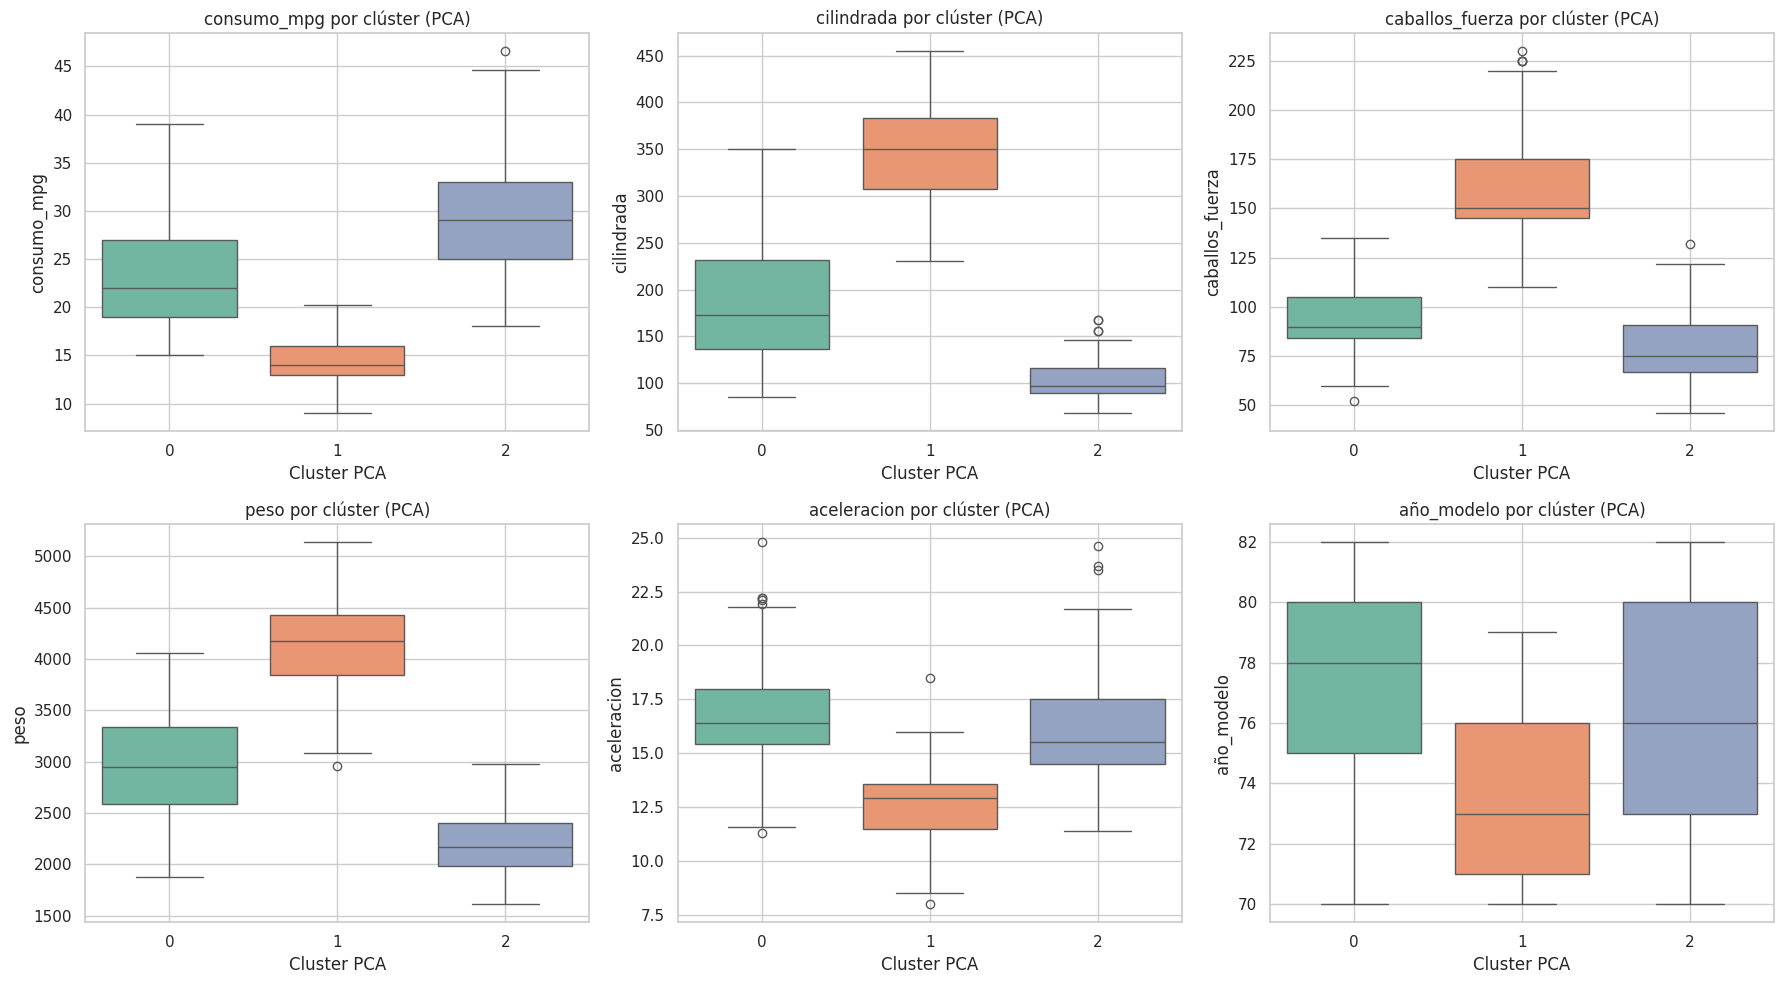

In [73]:
# Variables originales
variables = ['consumo_mpg', 'cilindrada', 'caballos_fuerza', 'peso', 'aceleracion', 'año_modelo']

# Crear figura de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Boxplot por variable usando cluster_pca
for i, var in enumerate(variables):
    sns.boxplot(x='cluster_pca', y=var, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{var} por clúster (PCA)')
    axes[i].set_xlabel('Cluster PCA')
    axes[i].set_ylabel(var)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

- consumo_mpg: el cluster 1 es el que menos millas por galon recorre y el cluster 2 es el mas eficiente encuanto a consumo (autos compactos).
- cilindrada: Cluster 1 tiene la mayor cilindrada con diferencia, con algunos valores por encima de 450 lo que implica motores grandes y potentes.
- caballos_fuerza: Igual que cilindrada el cluster 1 muy por encima, los demas estan bastante igualados.
- peso: Cluster 1 agrupa los autos más pesados, cluster 2 los más livianos.
- aceleracion: cluster 1 tiene las aceleraciones más rápidas, por lo tanto se consideran autos mas deportivos o con mas potencia por las grandes cilindradas.
- año_modelo: Cluster 1 agrupa autos más antiguos, cluster 2 y 0 agrupan modelos más recientes.

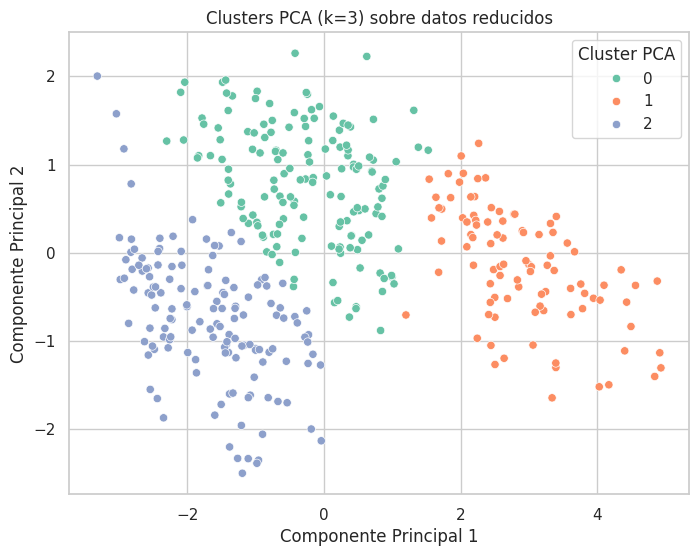

In [74]:
# Reduccion de dimensionalidad
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_pca'], palette='Set2', legend='full')
plt.title("Clusters PCA (k=3) sobre datos reducidos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.legend(title='Cluster PCA')
plt.show()

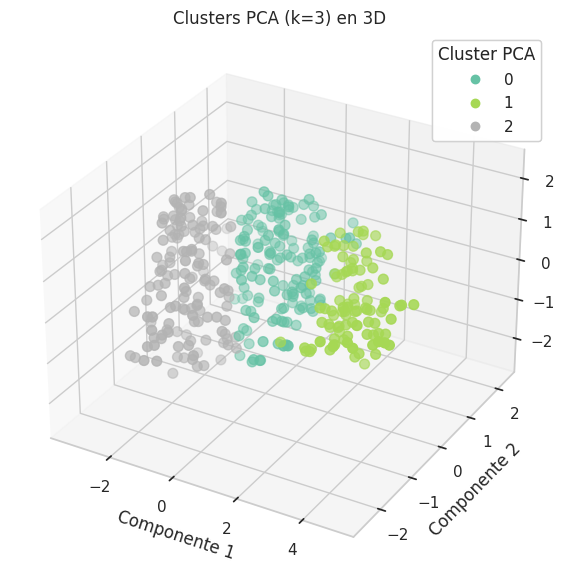

In [77]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Gráfico 3D
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=df['cluster_pca'], cmap='Set2', s=50
)
ax.set_title("Clusters PCA (k=3) en 3D")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster PCA")
ax.add_artist(legend1)

plt.show()

## 6- Conclusiones

A lo largo de este trabajo se analizó el dataset Auto MPG aplicando técnicas de clustering no supervisado, con el objetivo de identificar agrupaciones naturales de vehículos según sus características técnicas. Se utilizaron variables como `peso`, `cilindrada`, `caballos de fuerza`, `aceleración`, `año` del modelo y `origen`, dejando fuera la variable `consumo_mpg` por ser considerada una variable objetivo, es decir, una consecuencia directa de las otras. También se eliminaron las variables `cilindros` y `nombre_auto` por su redundancia o irrelevancia para el análisis.

El clustering aplicado sobre el dataset original permitió identificar grupos bien definidos: autos grandes, antiguos y de alto consumo, autos compactos, modernos y eficientes, y vehículos intermedios con características balanceadas. Estos grupos mostraron una correspondencia evidente con atributos reales como el año de fabricación y el origen geográfico (por ejemplo, autos estadounidenses vs. japoneses).

Luego, se aplicó una reducción de dimensionalidad con `PCA` para simplificar la visualización de los datos, esto permitió observar visualmente la estructura de los grupos a través de gráficos 2D y 3D. Los clusters en estos graficos siguieron siendo distinguibles.

Respecto a la elección del número de clusters, se consideraron tanto el método del codo como el Silhouette Score. Aunque ambos sugerían un valor cercano a 5 o 6, se optó por trabajar con 6 clusters. Si bien esto introdujo una mayor complejidad visual, también permitió capturar mejor las diferencias técnicas entre los vehículos. Elegir menos clusters podría haber ocultado esas diferencias al agrupar autos con características muy distintas. En cambio, con 6 clusters se logró una segmentación más detallada que respeta la diversidad técnica.

También se observó que, incluso antes de aplicar el clustering, los gráficos de dispersión y boxplots ya mostraban relaciones claras entre las variables técnicas y el consumo de combustible.

Respecto a si los clusters se corresponden con clases reales, se observó que los grupos formados por K-means coinciden con patrones lógicos y reales: vehículos antiguos y pesados de origen estadounidense, autos compactos y eficientes de origen japonés, y modelos intermedios más modernos.

En cuanto a la reducción de dimensionalidad con PCA, no mejoró el desempeño del clustering en términos de precisión o separación numérica, ya que se perdió parte de la información original. Sin embargo, mejoró la visualización e interpretación.

Finalmente, esta experiencia me permitió aplicar un proceso completo de análisis no supervisado, comprender cómo las variables técnicas se relacionan con el rendimiento de los vehículos, y reflexionar sobre el impacto que tiene la elección de variables y cantidad de clusters. Me gustaría seguir experimentando por mi cuenta, por ejemplo, eliminando alguna variable adicional con alta correlación como peso, cilindrada o caballos_fuerza para observar cómo eso podría afectar la calidad de los agrupamientos.

# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

In [78]:
# DBSCAN sobre datos originales
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

# Guardar etiquetas
df['cluster_dbscan'] = dbscan.labels_

# Ver distribución de clusters
print(df['cluster_dbscan'].value_counts().sort_index())


cluster_dbscan
-1      1
 0    391
Name: count, dtype: int64


In [79]:
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_pca.fit(X_pca)

# Guardar etiquetas
df['cluster_dbscan_pca'] = dbscan_pca.labels_

# Ver distribución
print(df['cluster_dbscan_pca'].value_counts().sort_index())

cluster_dbscan_pca
-1     13
 0    379
Name: count, dtype: int64


## 7.2 Análisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿ los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

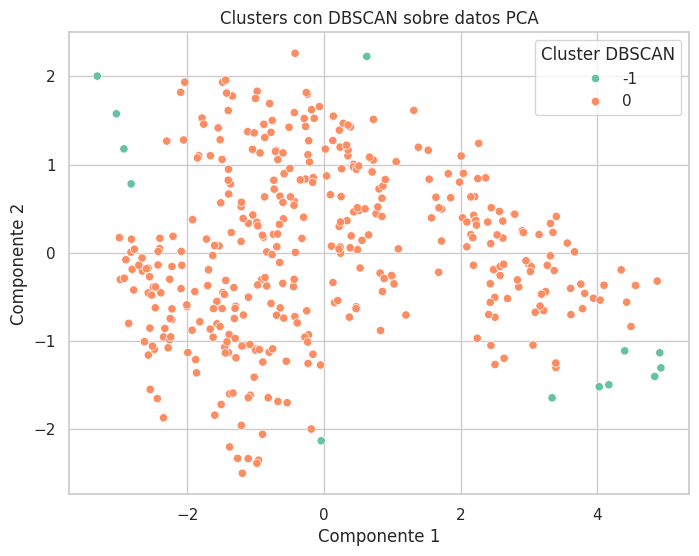

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster_dbscan_pca'], palette='Set2', legend='full')
plt.title("Clusters con DBSCAN sobre datos PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend(title="Cluster DBSCAN")
plt.grid(True)
plt.show()

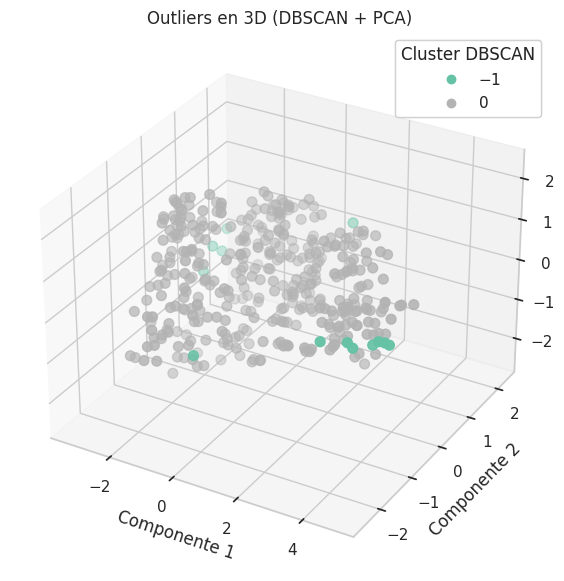

In [82]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=df['cluster_dbscan_pca'], cmap='Set2', s=50
)
ax.set_title("Outliers en 3D (DBSCAN + PCA)")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster DBSCAN")
ax.add_artist(legend1)
plt.show()


- Sobre los datos originales, DBSCAN detectó un único cluster que abarca casi la totalidad de los registros (391) y solo un dato como ruido.
- Con PCA, el algoritmo logró detectar 13 outliers, una pequeña mejora en la detección de outliers. Sin embargo, también agrupó al resto de los autos en un único cluster.
- Los outliers no forman un cluster propio.

Mi conclusion es que K-means resulto mucho mas util para agrupar autos naturalmente segun sus condiciones tecnicas.

# Referencias:
- Scikit-learn – Documentación oficial.
Teoría, ejemplos y código para algoritmos como K-means, PCA y DBSCAN.
https://scikit-learn.org/stable/index.html

- UCI Machine Learning Repository – Auto MPG Dataset.
Fuente del conjunto de datos utilizado.
https://archive.ics.uci.edu/dataset/9/auto+mpg

- Video educativo – Clustering no supervisado con Python.
Explicación clara de K-means, DBSCAN y visualización de clusters.
https://www.youtube.com/watch?v=mICySHB0fh4&t=1367s

- Asistencia en redacción y codificación:
Ayuda en la sintaxis y la correcion de errores en la codificacion.
https://chatgpt.com/

- Material Educativo.